In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.shape

(4177, 9)

In [7]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [8]:
## univariate analysis

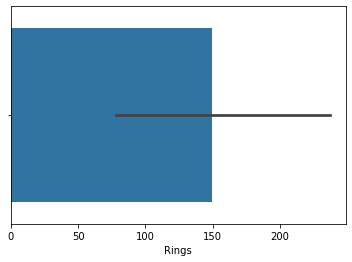

In [9]:
sns.barplot(df['Rings'].value_counts())

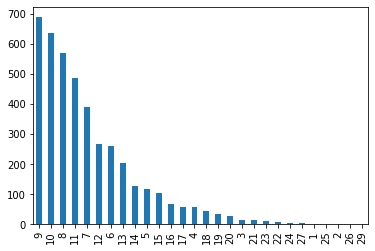

In [10]:
df['Rings'].value_counts().plot.bar()

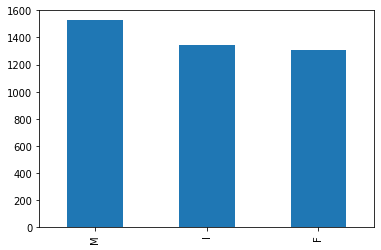

In [11]:
df['Sex'].value_counts().plot.bar()

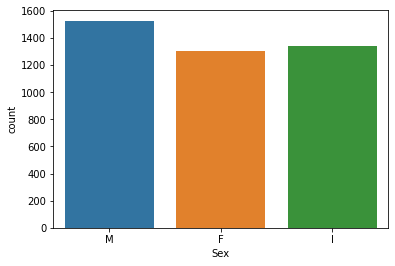

In [12]:
sns.countplot(df['Sex'])

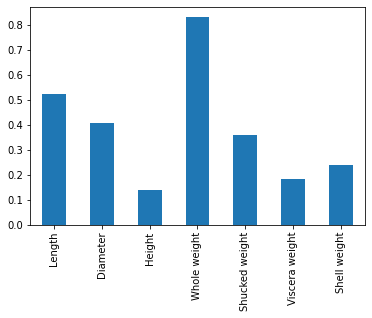

In [13]:
df.describe().iloc[1,0:-1].plot.bar()

In [14]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [15]:
df['Sex'] = df['Sex'].replace('M',1)
df['Sex'] = df['Sex'].replace('I',0)
df['Sex'] = df['Sex'].replace('F',2)

In [16]:
df['Sex'].value_counts()

1    1528
0    1342
2    1307
Name: Sex, dtype: int64

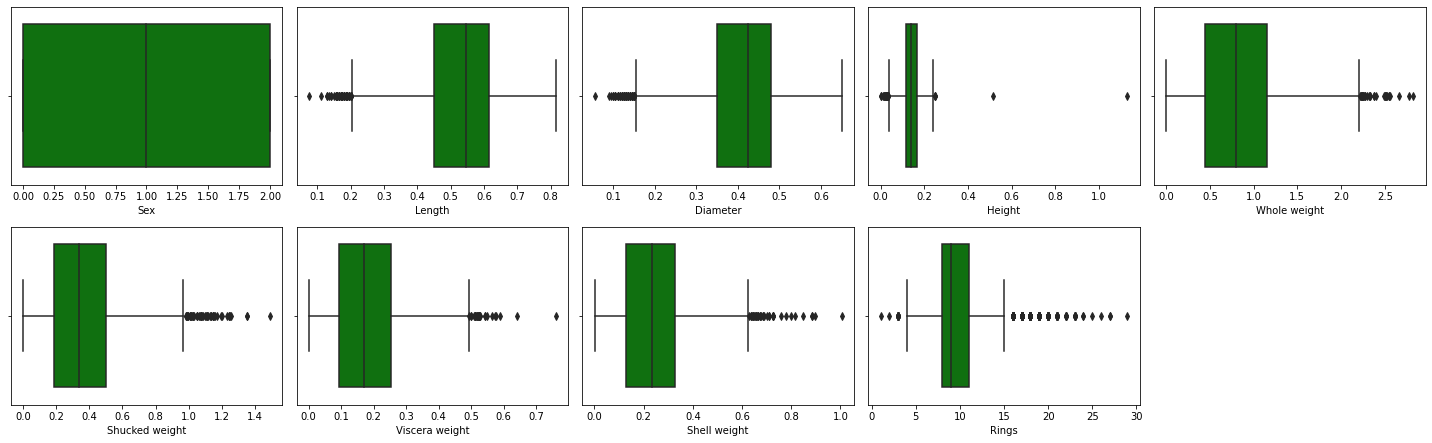

In [17]:
col=df.columns.values
plt.figure(figsize=(20,15))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(df[col[i]], color='green', orient='v')
    plt.tight_layout()

In [18]:
## removing outliers

In [19]:
from scipy.stats import zscore
z = np.abs(zscore(df))

In [20]:
df2 = df[(z<3).all(axis=1)]
df2.shape

(4027, 9)

In [21]:
df.shape

(4177, 9)

In [22]:
#4177-4027 = 150 /// 150 data points are removed

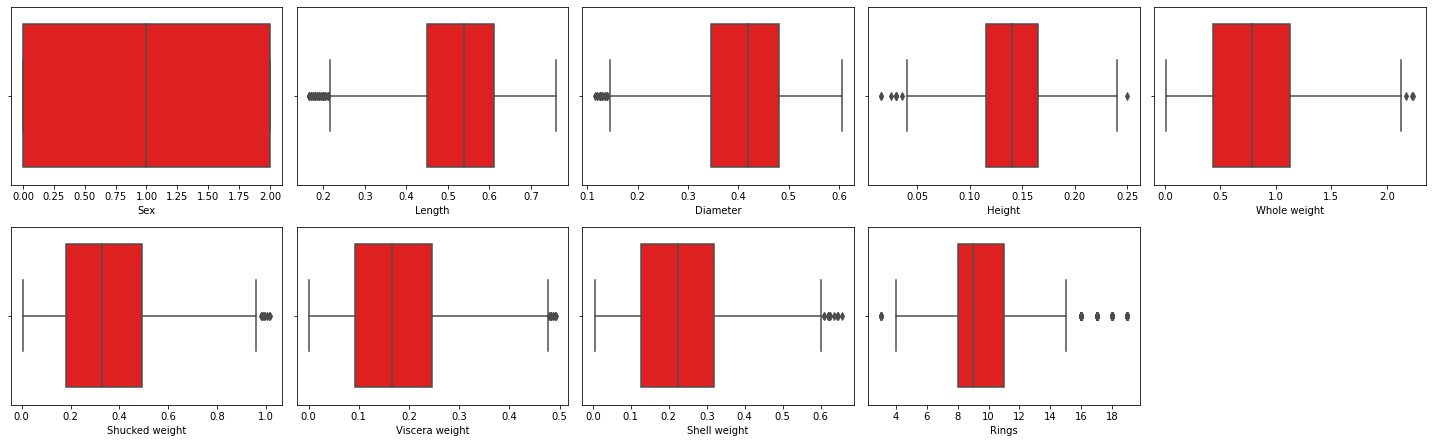

In [23]:
col=df2.columns.values
plt.figure(figsize=(20,15))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(df2[col[i]], color='red', orient='v')
    plt.tight_layout()

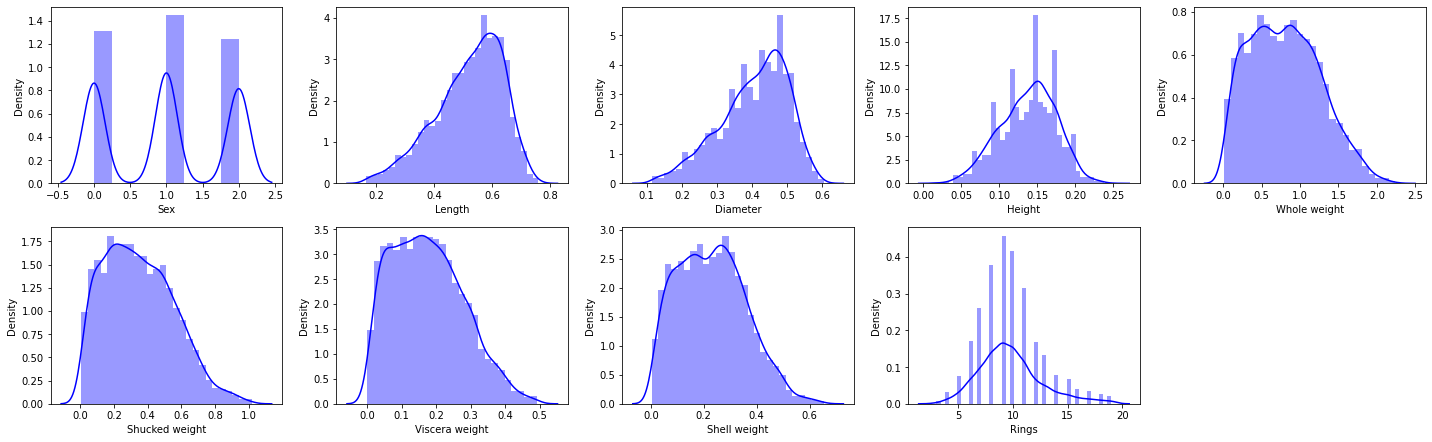

In [24]:
col=df2.columns.values
plt.figure(figsize=(20,15))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.distplot(df2[col[i]], color='blue')
    plt.tight_layout()

In [25]:
df2.skew()

Sex               0.032540
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [26]:
df3 = df2.copy()
df3['Shucked weight'] = np.sqrt(df2['Shucked weight'])
df3['Viscera weight'] = np.log1p(df2['Viscera weight'])
df3['Shell weight'] = np.log1p(df2['Shell weight'])

In [27]:
df3.skew()

Sex               0.032540
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight   -0.226336
Viscera weight    0.268443
Shell weight      0.141824
Rings             0.725464
dtype: float64

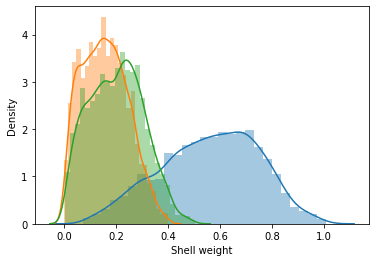

In [28]:

sns.distplot(df3['Shucked weight'])
sns.distplot(df3['Viscera weight'])
sns.distplot(df3['Shell weight'])

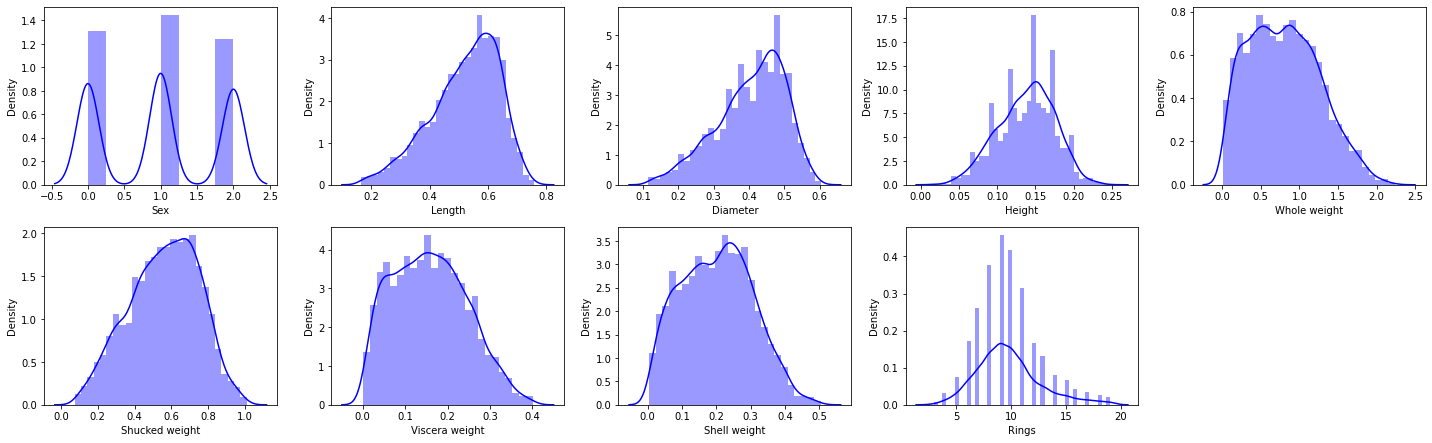

In [29]:
col=df3.columns.values
plt.figure(figsize=(20,15))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.distplot(df3[col[i]], color='blue')
    plt.tight_layout()

In [30]:
df4 = df3.copy()

In [31]:
df4['Length'] = np.log1p(df4['Length'])
df4['Diameter'] = np.log1p(df4['Diameter'])

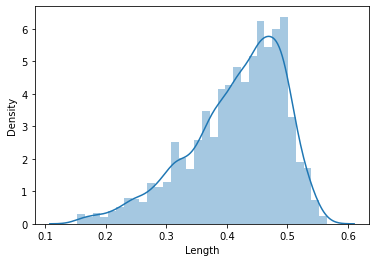

In [32]:
sns.distplot(df4['Length'])

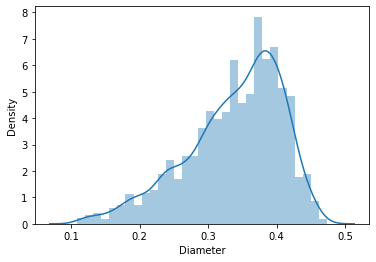

In [33]:
sns.distplot(df4['Diameter'])

In [34]:
## slight skewness is still present ..however skewness is decreased comparitively

In [35]:
## bivariate analysis

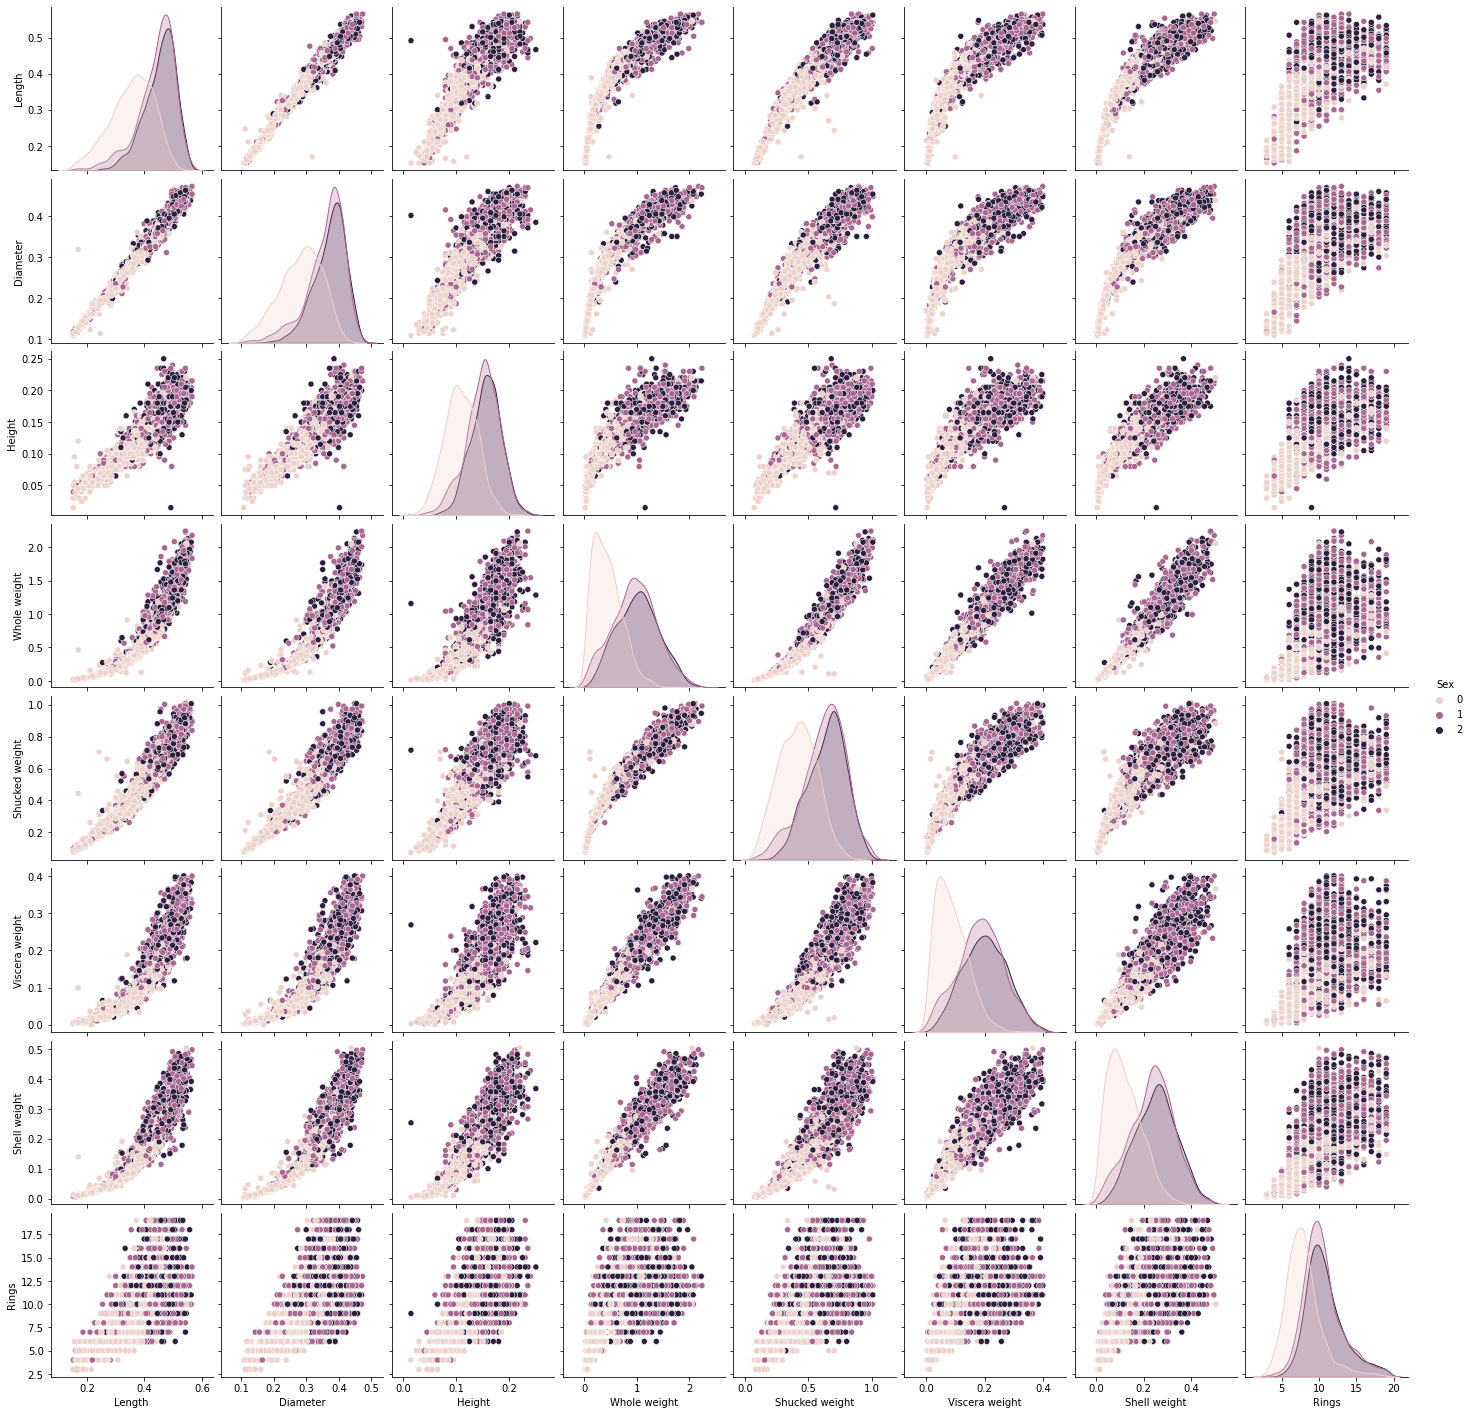

In [36]:
sns.pairplot(df4,hue='Sex')

In [37]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.503697,0.516450,0.477850,0.501511,0.459731,0.505693,0.499103,0.401445
Length,0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [38]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
correlation(df4,0.9)

{'Diameter',
 'Height',
 'Shell weight',
 'Shucked weight',
 'Viscera weight',
 'Whole weight'}

In [40]:
## all these features are 90% depends on each other so we can drop them as they hav a same affect on output

In [41]:
df5 = df4.drop(['Diameter', 'Shell weight', 'Shucked weight', 'Viscera weight'],axis=1)

In [42]:
df5.shape

(4027, 5)

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df6 = pd.DataFrame(ss.fit_transform(df5.iloc[:,0:-1]),columns=df5.columns[0:-1])

In [44]:
## model building

In [45]:
x = df6
y = df5.iloc[:,-1]

In [50]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=reg.score(x_test,y_test)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [51]:
lg = LinearRegression()

In [52]:
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.3711519391460213
The accuracy score at r_state 43 is 0.3926094563365213
The accuracy score at r_state 44 is 0.40529917176079405
The accuracy score at r_state 45 is 0.42190375436061744
The accuracy score at r_state 46 is 0.4055091244794719
The accuracy score at r_state 47 is 0.3955088485377424
The accuracy score at r_state 48 is 0.37382974670027125
The accuracy score at r_state 49 is 0.42182288835000864
The accuracy score at r_state 50 is 0.3850796876987775
The accuracy score at r_state 51 is 0.39661519848134585
The accuracy score at r_state 52 is 0.350013113504941
The accuracy score at r_state 53 is 0.36257262719237293
The accuracy score at r_state 54 is 0.3803650766112715
The accuracy score at r_state 55 is 0.3987310310593768
The accuracy score at r_state 56 is 0.3905761484812819
The accuracy score at r_state 57 is 0.3931906993445038
The accuracy score at r_state 58 is 0.4193209813229612
The accuracy score at r_state 59 is 0.4176459174051255
The a

0.431562047308848

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=62)

In [60]:
lg = LinearRegression()
lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)
print(lg.score(x_train,y_train))
print(lg.score(x_test,y_test))
print(r2_score(y_test,y_pred_lg))

0.38201179019325066
0.431562047308848
0.43156204730884795


In [55]:
##sns.scatterplot(df6['Sex'],df5['Rings'])

In [56]:
##sns.scatterplot(df6['Height'],df5['Rings'])

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)
print(polyreg.score(x_train,y_train))
print(polyreg.score(x_test,y_test))

0.41072885206433185
0.44129096141709717


In [78]:
## polynomial with degree 2 is giving better results than linear reg

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [65]:
dtg = DecisionTreeRegressor()
params = {'criterion' :["mse", "friedman_mse", "mae",],
          'splitter':['best', 'random'],
          'min_samples_split':np.arange(1,10,2),
          'min_samples_leaf':np.arange(1,6)}
gcv_model = GridSearchCV(estimator=dtg,param_grid=params)
gcv_model.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
             

In [66]:
gcv_model.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'splitter': 'random'}

In [67]:
dtr_best = DecisionTreeRegressor(criterion='mse',min_samples_leaf=5,min_samples_split= 7,splitter='random')
dtr_best.fit(x_train,y_train)
y_preddtr = dtr_best.predict(x_test)
print(dtr_best.score(x_train,y_train))
print(dtr_best.score(x_test,y_test))
print('r2_score for decision tree regressor :',r2_score(y_test,y_preddtr))

0.5168036092283856
0.3503318874754012
r2_score for decision tree regressor : 0.3503318874754012


In [73]:
svr = SVR()
svr.fit(x_train,y_train)
y_predsvr = svr.predict(x_test)
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))
print('r2_score for SVR :',r2_score(y_test,y_predsvr))

0.3914102753734643
0.44238194412097864
r2_score for SVR : 0.44238194412097864


In [74]:
knr = KNeighborsRegressor()
params_knr = {'n_neighbors' : np.arange(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knr_model = GridSearchCV(knr,params_knr)
knr_model.fit(x_train,y_train)
knr_model.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 9}

In [75]:
knr_best = KNeighborsRegressor(n_neighbors=9,algorithm='ball_tree')
knr_best.fit(x_train,y_train)
y_predknr = svr.predict(x_test)
print(knr_best.score(x_train,y_train))
print(knr_best.score(x_test,y_test))
print('r2_score for KNeighborsClassifier :',r2_score(y_test,y_predknr))


0.48732466376824646
0.41037933406922306
r2_score for KNeighborsClassifier : 0.44238194412097864


In [79]:
##ensembling algos

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rfg = RandomForestRegressor()
params_rfg = {'n_estimators' : np.arange(100,120,2),
          'min_samples_split' : np.arange(1,10),
          'min_samples_leaf' : np.arange(1,5)}
rfg_model = GridSearchCV(rfg,params_rfg)
rfg_model.fit(x_train,y_train)
rfg_model.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 110}

In [83]:
rfg_best = RandomForestRegressor(min_samples_leaf= 4, min_samples_split= 9, n_estimators= 110)
rfg_best.fit(x_train,y_train)
y_predrfg = svr.predict(x_test)
print(rfg_best.score(x_train,y_train))
print(rfg_best.score(x_test,y_test))
print('r2_score for RandomForestRegressor :',r2_score(y_test,y_predrfg))


0.6633882947611819
0.40523121866075407
r2_score for RandomForestRegressor : 0.44238194412097864


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
gbr=GradientBoostingRegressor()
params_gbr = {'n_estimators' : [100,110,120],
              'learning_rate' : [0.1,0.2,0.3,0.4,0.5]}
gbr_model = GridSearchCV(gbr,params_gbr)
gbr_model.fit(x_train,y_train)
gbr_model.best_params_


{'learning_rate': 0.1, 'n_estimators': 100}

In [91]:
gbr_best = GradientBoostingRegressor(learning_rate=0.1, n_estimators= 100)
gbr_best.fit(x_train,y_train)
y_predgbr = gbr_best.predict(x_test)
print('train_score :', gbr_best.score(x_train,y_train))
print('test_score:', gbr_best.score(x_test,y_test))
print('r2_score for GradientBoostRegressor :',r2_score(y_test,y_predgbr))

train_score : 0.48524150589218795
test_score: 0.4514662162463155
r2_score for GradientBoostRegressor : 0.45146621624631555


In [92]:
## so random forest regressor seeems to be best model`

In [96]:
from xgboost import XGBRegressor

xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)
y_predxgbr = xgbr.predict(x_test)
print('train_score :', xgbr.score(x_train,y_train))
print('test_score:', xgbr.score(x_test,y_test))
print('r2_score for xgbregregressor :',r2_score(y_test,y_predxgbr))


[16:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train_score : 0.48120130020844054
test_score: 0.44979566037224944
r2_score for xgbregregressor : 0.4497956603722494


In [99]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor( learning_rate=0.01, n_estimators=150, random_state=50)
abr.fit(x_train,y_train)
y_predabr = abr.predict(x_test)
print('train_score :',abr.score(x_train,y_train))
print('test_score:', abr.score(x_test,y_test))
print('r2_score for xgbregregressor :',r2_score(y_test,y_predabr))

train_score : 0.3963298300310739
test_score: 0.4157566639729774
r2_score for xgbregregressor : 0.4157566639729774


In [100]:
## gradient boosting algoriyhm is the best model

In [101]:
import joblib

In [102]:
joblib.dump(gbr_best,'abalone.pkl')

['abalone.pkl']